In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('/Users/CKY/Desktop/빅데이터/c1_1.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df

,idOrder,Price,Gender,Age,FamilyCount,MemberYN,agegroup,d_year,d_month,d_day,d_hour,d_minute,o_year,o_month,o_day,o_hour,o_minute,o_sec,dow
0,U10001-O2021-1002,92900,여성,26.0,2.0,Y,20,2021,1,8,6,24,2021,1,7,17,8,51,0
1,U10001-O2021-1003,81240,여성,26.0,2.0,Y,20,2021,1,15,6,28,2021,1,14,16,50,14,0
2,U10001-O2021-1004,60350,여성,26.0,2.0,Y,20,2021,1,22,4,24,2021,1,21,20,36,6,0
3,U10001-O2021-1005,66370,여성,26.0,2.0,Y,20,2021,1,30,6,41,2021,1,28,21,7,31,0
4,U10001-O2021-1006,142840,여성,26.0,2.0,Y,20,2021,2,5,6,49,2021,2,4,16,59,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171922,U13000-O2023-1013,100720,여성,30.0,1.0,N,30,2023,9,19,4,37,2023,9,18,10,4,4,0
171923,U13000-O2023-1007,46950,여성,30.0,1.0,N,30,2023,9,22,5,26,2023,9,21,20,42,33,0
171924,U13000-O2023-1014,16980,여성,30.0,1.0,N,30,2023,10,10,5,35,2023,10,8,22,19,56,1
171925,U13000-O2023-1015,74280,여성,30.0,1.0,N,30,2023,12,12,6,12,2023,12,10,22,16,52,1


In [4]:
df_2021 = df[df['o_year'] == 2021]
df_2022 = df[df['o_year'] == 2022]
df_2023 = df[df['o_year'] == 2023]

# 통합

/Users/CKY/anaconda3/envs/posco/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/CKY/anaconda3/envs/posco/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/CKY/anaconda3/envs/posco/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


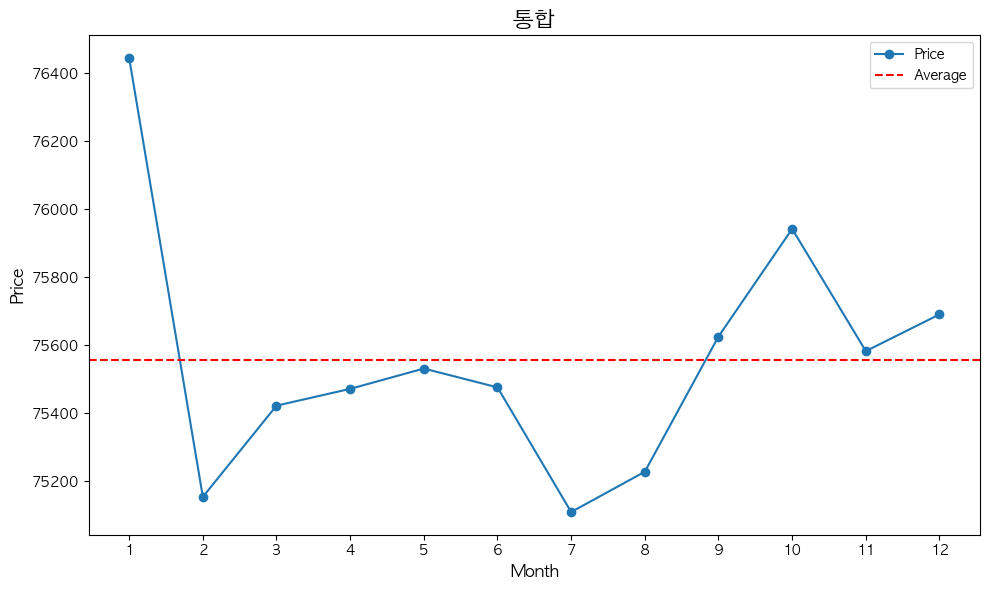

In [5]:
# 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df.groupby(['o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

plt.plot(df_grouped['o_month'], df_grouped['Price'], marker='o', label='Price')

# 전체 평균선을 추가
plt.axhline(df_grouped['Price'].mean(), color='red', linestyle='--', label='Average')

# 제목과 축 라벨 설정
plt.title('통합', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend()

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

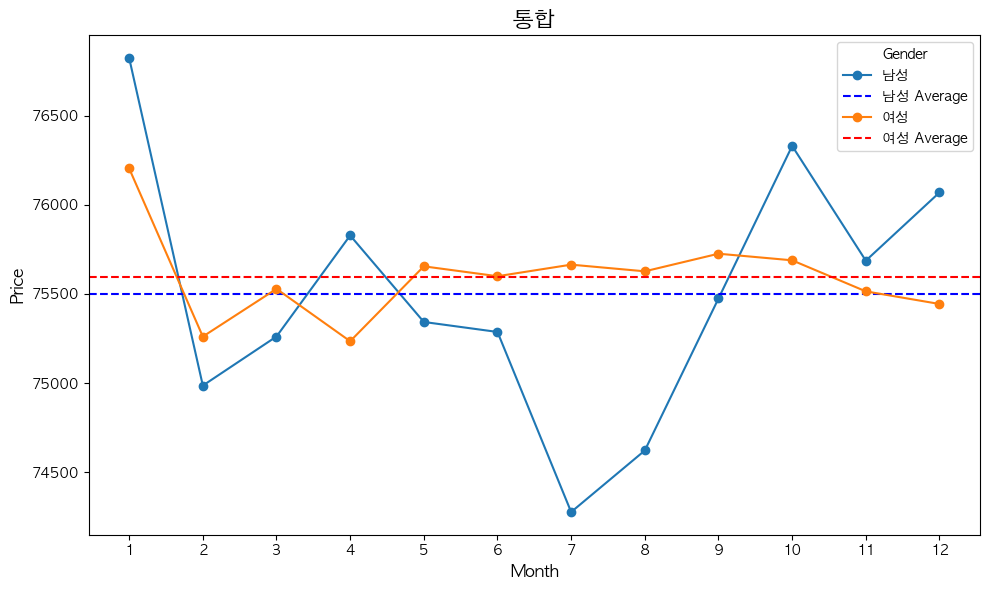

In [6]:
# 성별(Gender)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df.groupby(['Gender', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['Gender'].unique():
    gender_data = df_grouped[df_grouped['Gender'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)
    # 성별별 평균 가격 계산 및 평균선 추가
    plt.axhline(gender_data['Price'].mean(), linestyle='--', label=f'{gender} Average', color='red' if gender == '여성' else 'blue')

# 제목과 축 라벨 설정
plt.title('통합', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='Gender')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

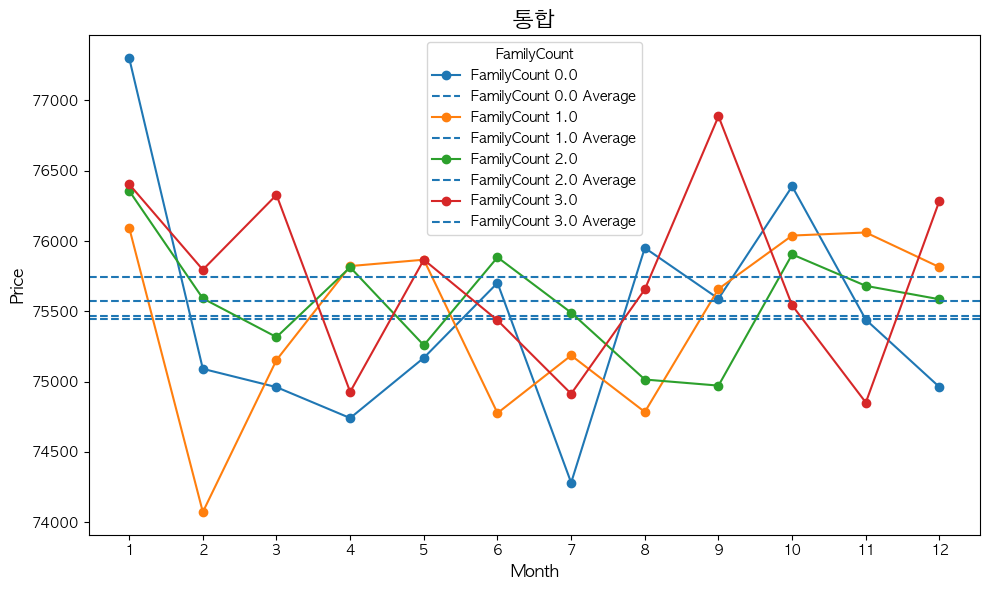

In [7]:
# 가족수(FamilyCount)와 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df.groupby(['FamilyCount', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 가족수에 따라 데이터를 분리하여 각각 플롯
for family_count in df_grouped['FamilyCount'].unique():
    family_data = df_grouped[df_grouped['FamilyCount'] == family_count]
    plt.plot(family_data['o_month'], family_data['Price'], marker='o', label=f'FamilyCount {family_count}')
    
    # 가족수별 평균 가격 계산 및 평균선 추가
    family_avg_price = family_data['Price'].mean()
    plt.axhline(family_avg_price, linestyle='--', label=f'FamilyCount {family_count} Average')

# 제목과 축 라벨 설정
plt.title('통합', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='FamilyCount')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

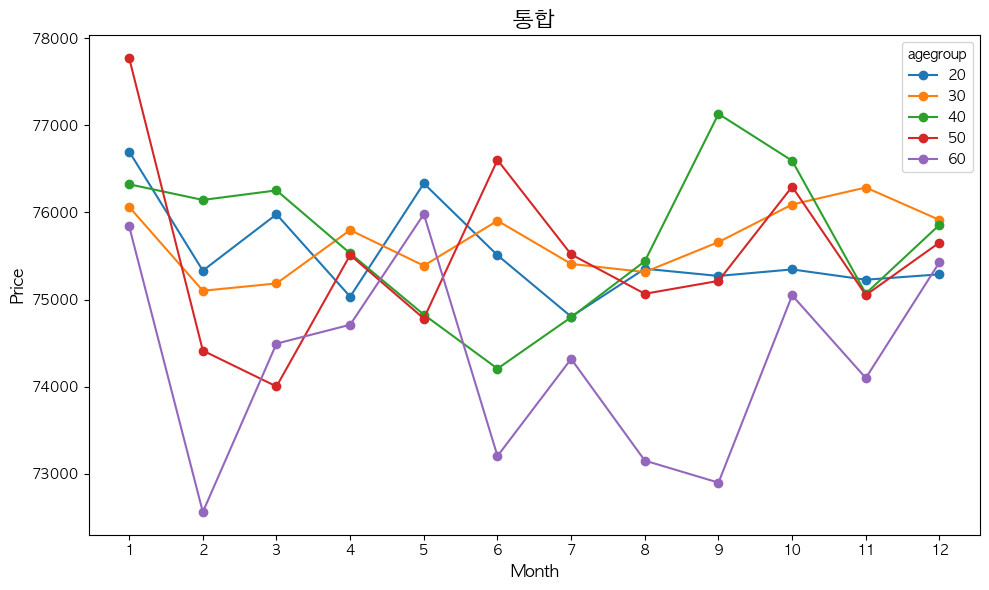

In [8]:
# 연령대(agegroup)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df.groupby(['agegroup', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['agegroup'].unique():
    gender_data = df_grouped[df_grouped['agegroup'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('통합', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='agegroup')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

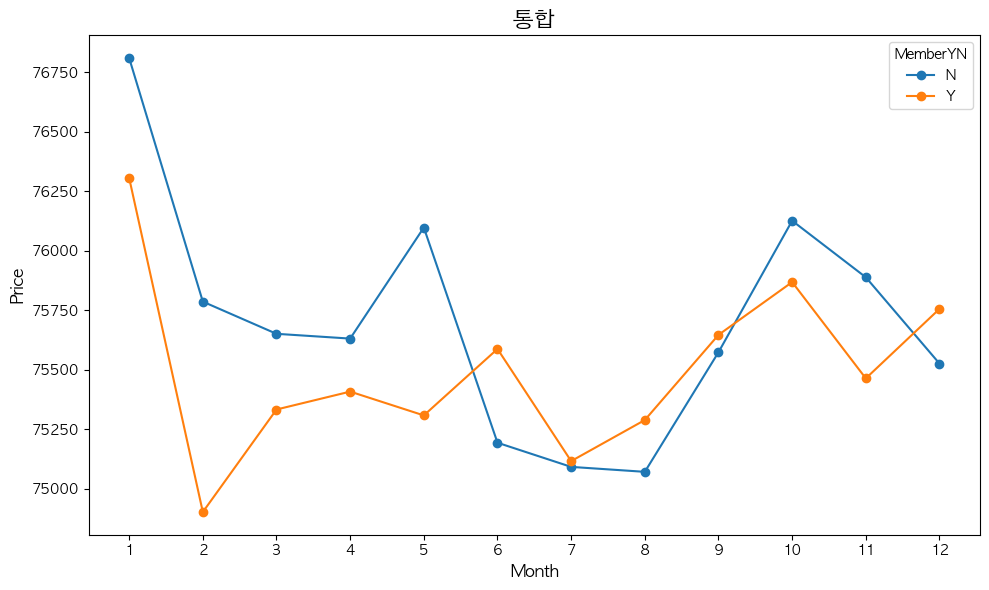

In [9]:
# 멤버십 유무(MemberYN)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df.groupby(['MemberYN', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['MemberYN'].unique():
    gender_data = df_grouped[df_grouped['MemberYN'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('통합', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='MemberYN')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

# 2023년

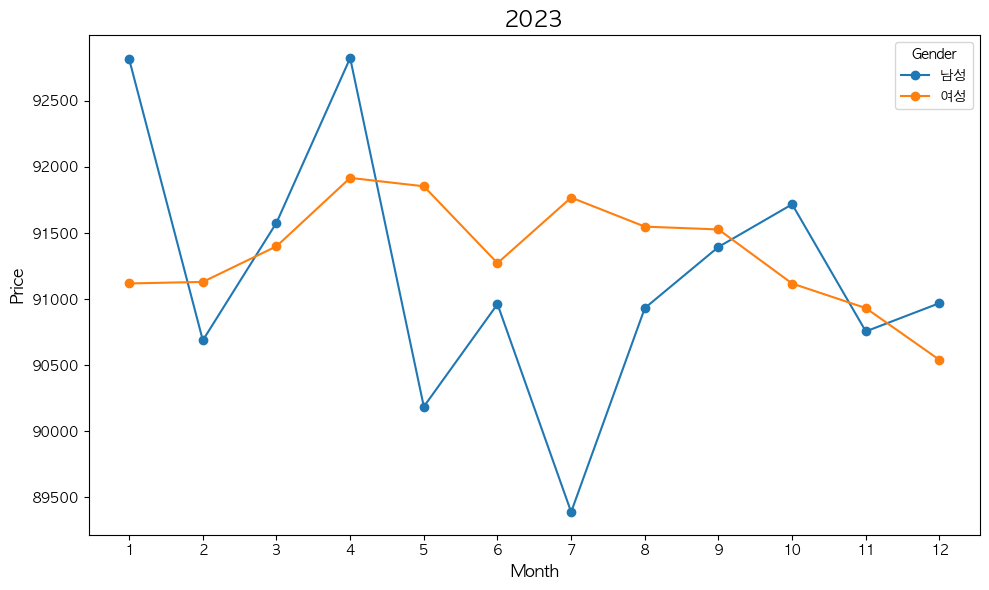

In [10]:
# 성별(Gender)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2023.groupby(['Gender', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['Gender'].unique():
    gender_data = df_grouped[df_grouped['Gender'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2023', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='Gender')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

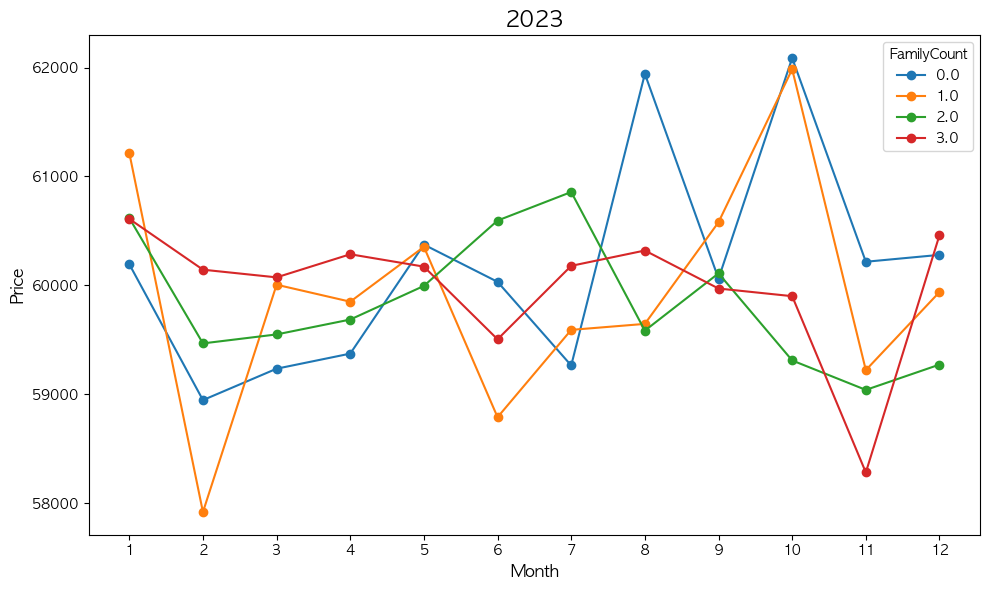

In [11]:
# 가족수(FamilyCount)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2021.groupby(['FamilyCount', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['FamilyCount'].unique():
    gender_data = df_grouped[df_grouped['FamilyCount'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2023', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='FamilyCount')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

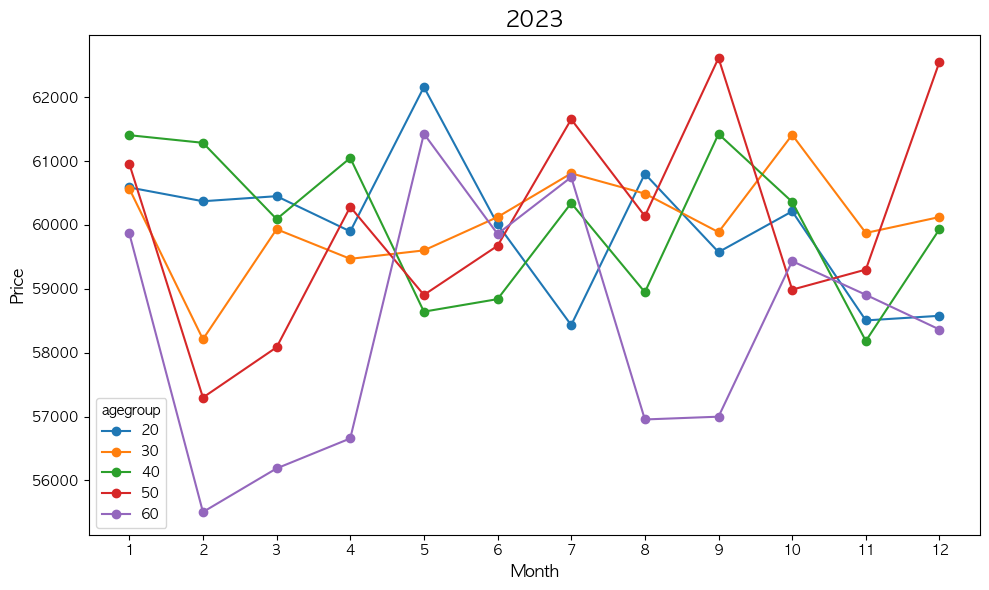

In [12]:
# 연령대(agegroup)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2021.groupby(['agegroup', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['agegroup'].unique():
    gender_data = df_grouped[df_grouped['agegroup'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2023', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='agegroup')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

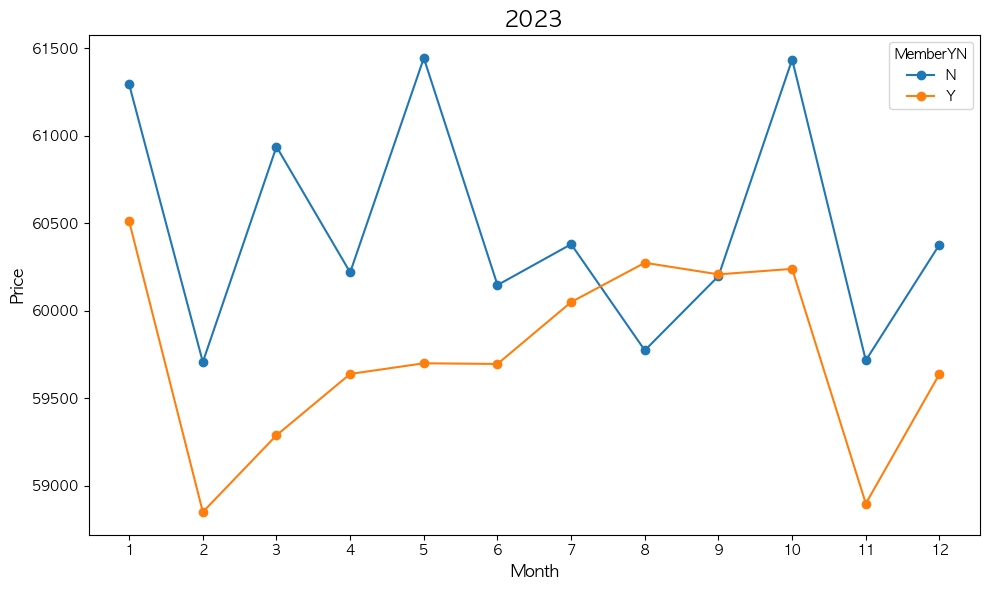

In [13]:
# 멤버십 유무(MemberYN)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2021.groupby(['MemberYN', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['MemberYN'].unique():
    gender_data = df_grouped[df_grouped['MemberYN'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2023', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='MemberYN')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

# 2022년

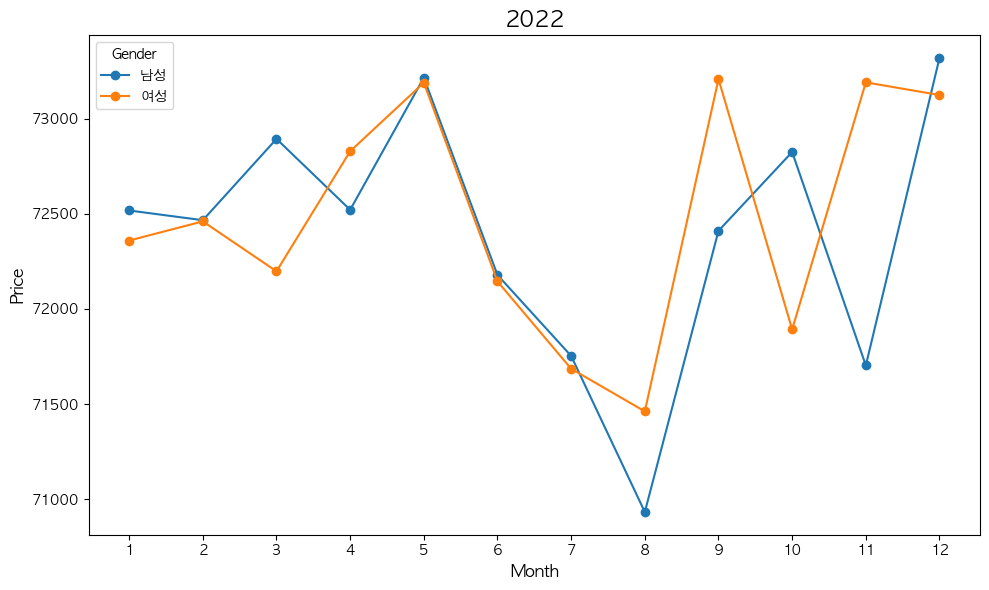

In [14]:
# 성별(Gender)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2022.groupby(['Gender', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['Gender'].unique():
    gender_data = df_grouped[df_grouped['Gender'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2022', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='Gender')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

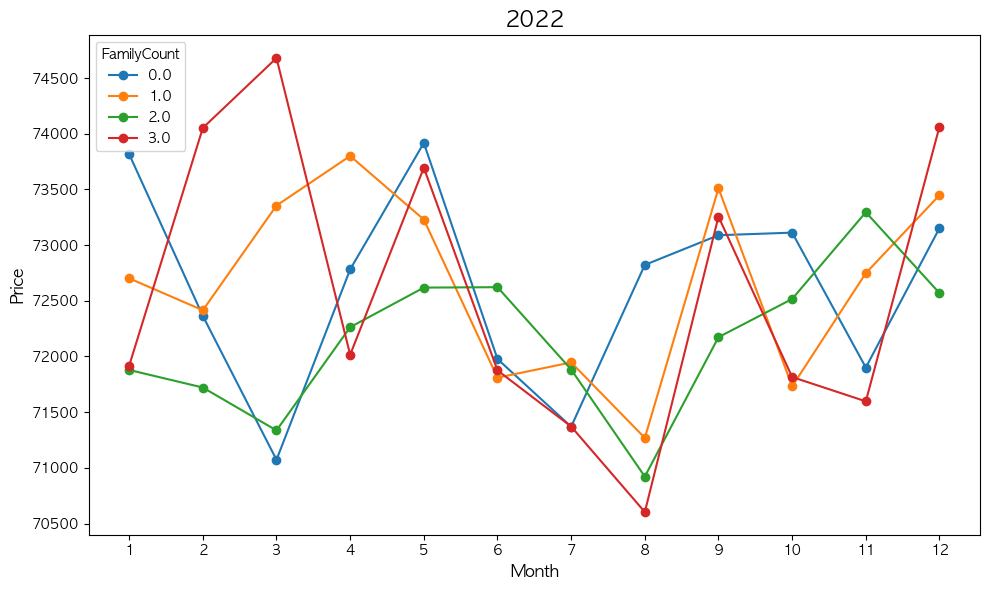

In [15]:
# 가족수(FamilyCount)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2022.groupby(['FamilyCount', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['FamilyCount'].unique():
    gender_data = df_grouped[df_grouped['FamilyCount'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2022', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='FamilyCount')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

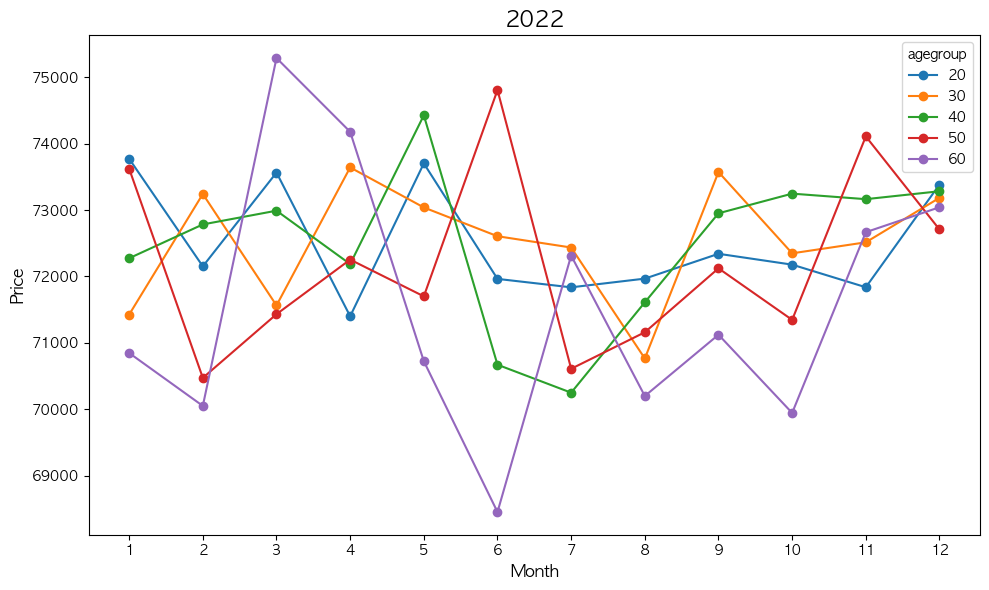

In [16]:
# 연령대(agegroup)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2022.groupby(['agegroup', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['agegroup'].unique():
    gender_data = df_grouped[df_grouped['agegroup'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2022', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='agegroup')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

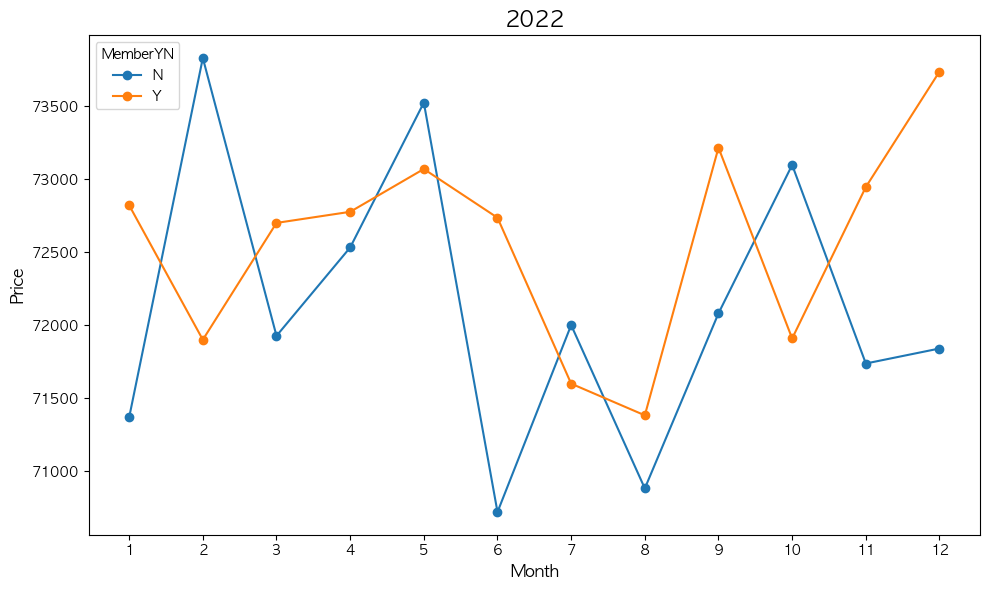

In [17]:
# 멤버십 유무(MemberYN)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2022.groupby(['MemberYN', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['MemberYN'].unique():
    gender_data = df_grouped[df_grouped['MemberYN'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2022', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='MemberYN')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

# 2021년

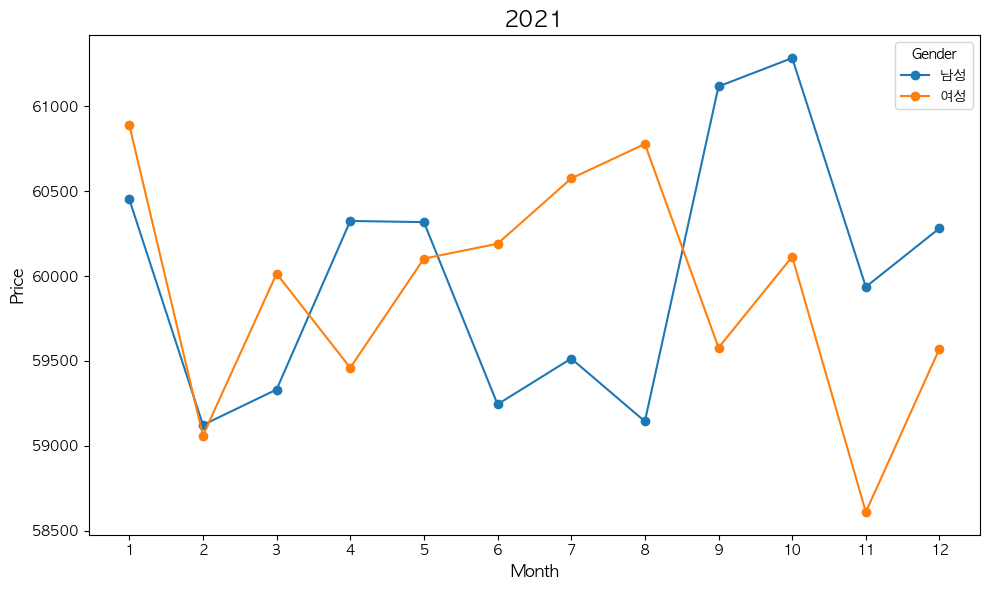

In [18]:
# 성별(Gender)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2021.groupby(['Gender', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['Gender'].unique():
    gender_data = df_grouped[df_grouped['Gender'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2021', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='Gender')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

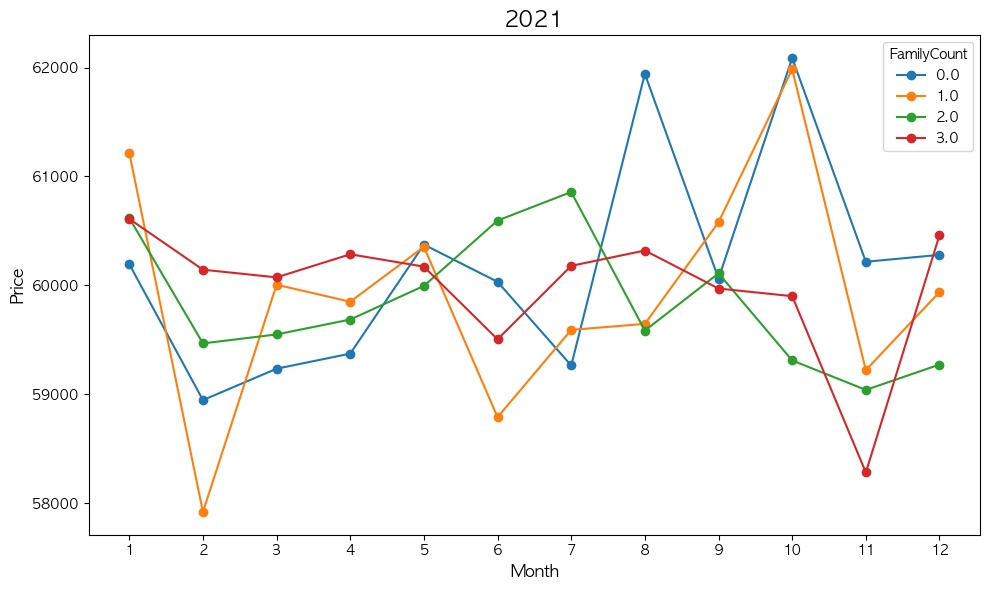

In [19]:
# 가족수(FamilyCount)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2021.groupby(['FamilyCount', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['FamilyCount'].unique():
    gender_data = df_grouped[df_grouped['FamilyCount'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2021', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='FamilyCount')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

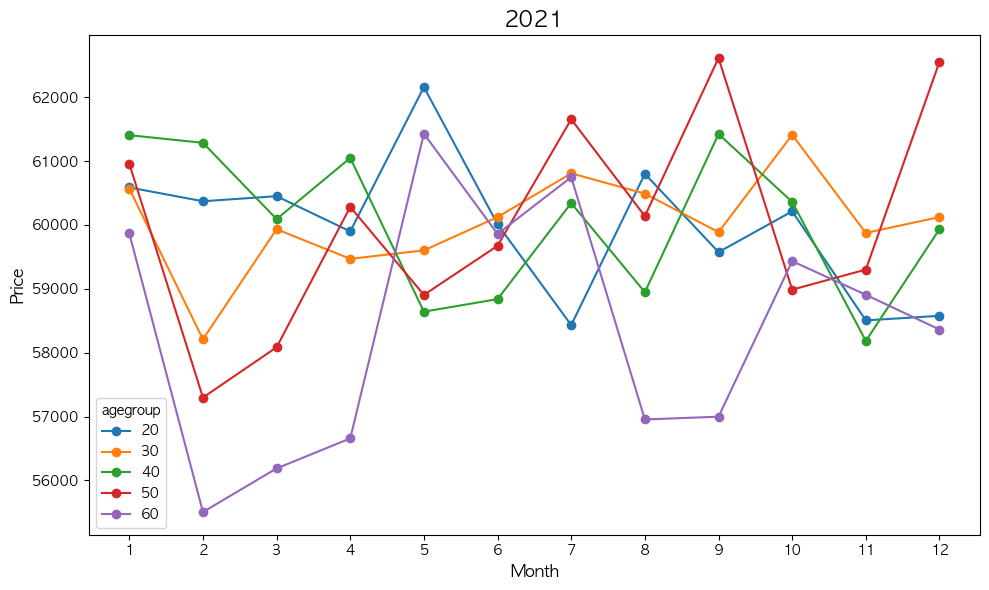

In [20]:
# 연령대(agegroup)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2021.groupby(['agegroup', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['agegroup'].unique():
    gender_data = df_grouped[df_grouped['agegroup'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2021', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='agegroup')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

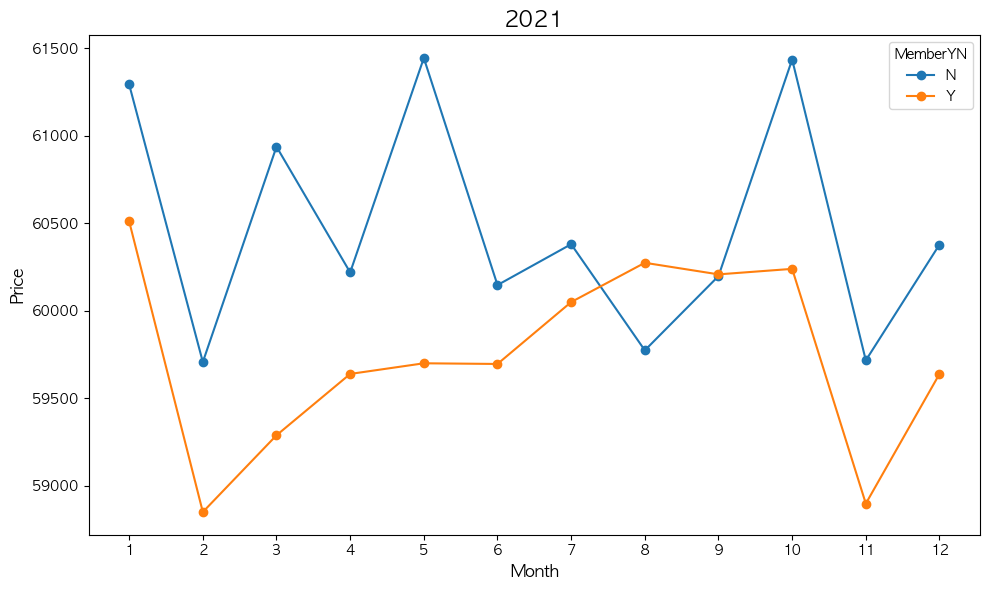

In [21]:
# 멤버십 유무(MemberYN)과 월(o_month)별로 평균 가격(Price)을 계산
df_grouped = df_2021.groupby(['MemberYN', 'o_month'])['Price'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 성별에 따라 데이터를 분리하여 각각 플롯
for gender in df_grouped['MemberYN'].unique():
    gender_data = df_grouped[df_grouped['MemberYN'] == gender]
    plt.plot(gender_data['o_month'], gender_data['Price'], marker='o', label=gender)

# 제목과 축 라벨 설정
plt.title('2021', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(1, 13))  # 월을 1부터 12까지 표시
plt.legend(title='MemberYN')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

# 빈도수

In [22]:
df

,idOrder,Price,Gender,Age,FamilyCount,MemberYN,agegroup,d_year,d_month,d_day,d_hour,d_minute,o_year,o_month,o_day,o_hour,o_minute,o_sec,dow
0,U10001-O2021-1002,92900,여성,26.0,2.0,Y,20,2021,1,8,6,24,2021,1,7,17,8,51,0
1,U10001-O2021-1003,81240,여성,26.0,2.0,Y,20,2021,1,15,6,28,2021,1,14,16,50,14,0
2,U10001-O2021-1004,60350,여성,26.0,2.0,Y,20,2021,1,22,4,24,2021,1,21,20,36,6,0
3,U10001-O2021-1005,66370,여성,26.0,2.0,Y,20,2021,1,30,6,41,2021,1,28,21,7,31,0
4,U10001-O2021-1006,142840,여성,26.0,2.0,Y,20,2021,2,5,6,49,2021,2,4,16,59,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171922,U13000-O2023-1013,100720,여성,30.0,1.0,N,30,2023,9,19,4,37,2023,9,18,10,4,4,0
171923,U13000-O2023-1007,46950,여성,30.0,1.0,N,30,2023,9,22,5,26,2023,9,21,20,42,33,0
171924,U13000-O2023-1014,16980,여성,30.0,1.0,N,30,2023,10,10,5,35,2023,10,8,22,19,56,1
171925,U13000-O2023-1015,74280,여성,30.0,1.0,N,30,2023,12,12,6,12,2023,12,10,22,16,52,1


In [23]:
df['id'] = df['idOrder'].str.split('-').str[0]

In [24]:
df

,idOrder,Price,Gender,Age,FamilyCount,MemberYN,agegroup,d_year,d_month,d_day,d_hour,d_minute,o_year,o_month,o_day,o_hour,o_minute,o_sec,dow,id
0,U10001-O2021-1002,92900,여성,26.0,2.0,Y,20,2021,1,8,6,24,2021,1,7,17,8,51,0,U10001
1,U10001-O2021-1003,81240,여성,26.0,2.0,Y,20,2021,1,15,6,28,2021,1,14,16,50,14,0,U10001
2,U10001-O2021-1004,60350,여성,26.0,2.0,Y,20,2021,1,22,4,24,2021,1,21,20,36,6,0,U10001
3,U10001-O2021-1005,66370,여성,26.0,2.0,Y,20,2021,1,30,6,41,2021,1,28,21,7,31,0,U10001
4,U10001-O2021-1006,142840,여성,26.0,2.0,Y,20,2021,2,5,6,49,2021,2,4,16,59,31,0,U10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171922,U13000-O2023-1013,100720,여성,30.0,1.0,N,30,2023,9,19,4,37,2023,9,18,10,4,4,0,U13000
171923,U13000-O2023-1007,46950,여성,30.0,1.0,N,30,2023,9,22,5,26,2023,9,21,20,42,33,0,U13000
171924,U13000-O2023-1014,16980,여성,30.0,1.0,N,30,2023,10,10,5,35,2023,10,8,22,19,56,1,U13000
171925,U13000-O2023-1015,74280,여성,30.0,1.0,N,30,2023,12,12,6,12,2023,12,10,22,16,52,1,U13000


In [25]:
# 'id' 기준으로 개수와 'Price' 합을 계산
df_summary = df.groupby('id').agg(
    count=('id', 'size'),  # id의 개수
    Price_sum=('Price', 'sum')  # Price의 합
).reset_index()

# Price_sum을 count로 나누어 새로운 컬럼 'Price_avg' 추가
df_summary['Price_avg'] = df_summary['Price_sum'] / df_summary['count']

# Price_avg로 내림차순 정렬
df_summary.sort_values(by='Price_avg', ascending=False)

,id,count,Price_sum,Price_avg
2242,U12243,26,2818570,108406.538462
835,U10836,16,1650190,103136.875000
316,U10317,16,1648170,103010.625000
2995,U12996,20,2027860,101393.000000
2910,U12911,25,2523330,100933.200000
...,...,...,...,...
2439,U12440,58,3403050,58673.275862
1521,U11522,53,3096430,58423.207547
443,U10444,37,2151490,58148.378378
618,U10619,71,3925240,55285.070423


In [26]:
# 상위 10%
top_10_percent = df_summary[df_summary['Price_avg'] >= df_summary['Price_avg'].quantile(0.9)]
print(top_10_percent)

          id  count  Price_sum      Price_avg
2     U10003     53    4662940   87980.000000
33    U10034     63    5416440   85975.238095
34    U10035     18    1557240   86513.333333
35    U10036     47    3969190   84450.851064
40    U10041     69    5825630   84429.420290
...      ...    ...        ...            ...
2955  U12956     64    5478460   85600.937500
2957  U12958     48    4270090   88960.208333
2961  U12962     54    4779660   88512.222222
2995  U12996     20    2027860  101393.000000
2998  U12999     55    4689840   85269.818182

[300 rows x 4 columns]


In [27]:
# 하위 10%
bottom_10_percent = df_summary[df_summary['Price_avg'] <= df_summary['Price_avg'].quantile(0.1)]
print(bottom_10_percent)

          id  count  Price_sum     Price_avg
13    U10014     63    3850100  61112.698413
19    U10020     60    3926600  65443.333333
23    U10024     62    4112740  66334.516129
28    U10029     69    4595290  66598.405797
55    U10056     66    4240560  64250.909091
...      ...    ...        ...           ...
2971  U12972     63    3997620  63454.285714
2973  U12974     66    4433140  67168.787879
2975  U12976     59    3790120  64239.322034
2986  U12987     65    4290880  66013.538462
2993  U12994     49    3015470  61540.204082

[300 rows x 4 columns]


In [28]:
df_r = pd.read_csv('/Users/CKY/Desktop/빅데이터/nnewtarget.csv')
df_r = df_r.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df_r['ItemCode0'] = df_r['ItemCode'].str.split('-',expand=True)[0]
df_r['ItemCode1'] = df_r['ItemCode'].str.split('-',expand=True)[1]
df_r['ItemCode2'] = df_r['ItemCode'].str.split('-',expand=True)[2]
df_r

,idUser,idOrder,ItemCode,Price,Gender,Age,FamilyCount,MemberYN,d_year,d_month,...,o_minute,o_sec,ItemName,PriceMin,PriceMax,o_date,dow,ItemCode0,ItemCode1,ItemCode2
0,U10001,U10001-O2021-1002,L4-M17-S0530-1024,33310,여성,26.0,2.0,Y,2021,1,...,8,51,완도 활전복 1kg 중 22-25미,33160.0,37070.0,2021-01-07,0,L4,M17,S0530
1,U10001,U10001-O2021-1002,L1-M21-S0540-1082,3780,여성,26.0,2.0,Y,2021,1,...,8,51,동원 양반 차돌된장찌개 (460G),3690.0,3970.0,2021-01-07,0,L1,M21,S0540
2,U10001,U10001-O2021-1002,L1-M15-S0140-1311,22520,여성,26.0,2.0,Y,2021,1,...,8,51,오뚜기 듬뿍 새우볶음밥450g (2인분) x 5봉지 /,22150.0,23150.0,2021-01-07,0,L1,M15,S0140
3,U10001,U10001-O2021-1002,L4-M12-S0350-1035,21630,여성,26.0,2.0,Y,2021,1,...,8,51,[산지직송] 새콤달콤 부사 사과 5kg (13과내),20810.0,23030.0,2021-01-07,0,L4,M12,S0350
4,U10001,U10001-O2021-1003,L4-M12-S0640-1057,11700,여성,26.0,2.0,Y,2021,1,...,50,14,스테비아 방울 토마토 라루 토망고 1kg,11640.0,13020.0,2021-01-14,0,L4,M12,S0640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843757,U13000,U13000-O2023-1008,L4-M12-S0350-1063,11520,여성,30.0,1.0,N,2023,12,...,6,13,경북 부사사과 가정용 한입 1.5kg 11과내,11100.0,11900.0,2023-12-28,0,L4,M12,S0350
843758,U13000,U13000-O2023-1008,L1-M12-S0330-1011,18870,여성,30.0,1.0,N,2023,12,...,6,13,국산 냉동 블루베리 1kg,18820.0,20180.0,2023-12-28,0,L1,M12,S0330
843759,U13000,U13000-O2023-1008,L1-M21-S0540-1161,3120,여성,30.0,1.0,N,2023,12,...,6,13,오뚜기 어린이 카레 80G,3080.0,3300.0,2023-12-28,0,L1,M21,S0540
843760,U13000,U13000-O2023-1008,L1-M17-S0030-1016,37760,여성,30.0,1.0,N,2023,12,...,6,13,[왕특대] 이동삼 안동 간고등어 140gX20팩,35420.0,37980.0,2023-12-28,0,L1,M17,S0030


In [29]:
df_top_10 = df_r[df_r['idUser'].isin(top_10_percent['id'])]
df_bottom_10 = df_r[df_r['idUser'].isin(bottom_10_percent['id'])]

In [30]:
# 'ItemName', 'ItemCode', 'ItemCode0', 'ItemCode1', 'ItemCode2'를 기준으로 그룹화하여 각 조합의 발생 빈도 계산
item_count = df_top_10.groupby(['ItemName', 'ItemCode', 'ItemCode0', 'ItemCode1', 'ItemCode2']).size().reset_index(name='count')

# 개수를 기준으로 내림차순 정렬
top_item_count_sorted = item_count.sort_values(by='count', ascending=False)
top_item_count_sorted.head(20)

,ItemName,ItemCode,ItemCode0,ItemCode1,ItemCode2,count
1513,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,L1-M11-S0220-1030,L1,M11,S0220,62
1314,국산 갯벌 낙지 중소 5마리 산소포장,L4-M17-S0130-1013,L4,M17,S0130,61
1042,감동 [감동]꿀고구마 10kg 대/왕크기 (개당 중량 400g이상),L4-M22-S0020-1042,L4,M22,S0020,58
1421,꿀사과 부사 3KG 9과 설날 선물세트,L4-M12-S0350-1078,L4,M12,S0350,58
2537,수박 지르go 신선한 겨울 하우스 고당도 임산부 꿀수박 5kg,L4-M12-S0430-1022,L4,M12,S0430,57
2585,스테비아 완숙토마토 토망고 3kg(1kg*3팩),L4-M12-S0640-1061,L4,M12,S0640,56
57,(당일발송) 추천방울토마토 1kg,L4-M12-S0640-1001,L4,M12,S0640,55
1186,괴산 부사 사과 3kg 11-13과,L4-M12-S0350-1073,L4,M12,S0350,55
891,[착한식탁]대추방울토마토 5kg 4번과,L4-M12-S0640-1019,L4,M12,S0640,53
333,[GAP인증] 가정용 나주배 7.5kg 8-10과,L4-M12-S0290-1003,L4,M12,S0290,53


In [31]:
# 'ItemName', 'ItemCode', 'ItemCode0', 'ItemCode1', 'ItemCode2'를 기준으로 그룹화하여 각 조합의 발생 빈도 계산
item_count = df_bottom_10.groupby(['ItemName', 'ItemCode', 'ItemCode0', 'ItemCode1', 'ItemCode2']).size().reset_index(name='count')

# 개수를 기준으로 내림차순 정렬
bottom_item_count_sorted = item_count.sort_values(by='count', ascending=False)
bottom_item_count_sorted.head(20)

,ItemName,ItemCode,ItemCode0,ItemCode1,ItemCode2,count
905,[참맘] 냉동 딸기 - 1kg (아이스팩 포함),L1-M12-S0200-1004,L1,M12,S0200,71
1455,냉동 미니 갑오징어 200g (베이비이까 손질),L4-M17-S0500-1005,L4,M17,S0500,67
3259,제주 냉동 자반 간 고등어 300g 1팩 HACCP 인증,L4-M17-S0030-1034,L4,M17,S0030,64
510,[딜라잇가든]냉동 딸기[국내산] 1kg,L1-M12-S0200-1002,L1,M12,S0200,63
869,[제주애월]1등급 무항생제 제주란 15구,L4-M23-S0900-1009,L4,M23,S0900,62
540,[마린마켓] 최상급 자연산 생물 낙지 활낙지 산낙지 낚지,L4-M17-S0130-1002,L4,M17,S0130,61
1362,그램원 손질 절단낙지 M/L 430g / 500g 낱개,L4-M17-S0130-1015,L4,M17,S0130,61
112,1+ 한우 절단국거리용 200g 냉장,L4-M23-S0930-1003,L4,M23,S0930,61
1080,경북 가정용 못난이 흠집 부사 사과 3kg(15-17과)소과,L4-M12-S0350-1052,L4,M12,S0350,61
982,[하선정]아삭한 포기김치 1.5kg,L4-M18-S0110-1032,L4,M18,S0110,60


In [32]:
top_10_l = df_top_10['ItemCode0'].value_counts().reset_index(name='count')
top_10_l.columns = ['ItemCode0', 'count']
top_10_l.sort_values(by='count', ascending=False)

,ItemCode0,count
0,L1,36007
1,L4,33442
2,L5,1246
3,L3,391


In [33]:
top_10_m = df_top_10['ItemCode1'].value_counts().reset_index(name='count')
top_10_m.columns = ['ItemCode1', 'count']
top_10_m.sort_values(by='count', ascending=False)

,ItemCode1,count
0,M12,15153
1,M17,13950
2,M22,13016
3,M11,6256
4,M15,5545
5,M23,3678
6,M18,2819
7,M19,2772
8,M24,2595
9,M21,2536


In [34]:
top_10_s = df_top_10['ItemCode2'].value_counts().reset_index(name='count')
top_10_s.columns = ['ItemCode2', 'count']
top_10_s.sort_values(by='count', ascending=False)

,ItemCode2,count
0,S0140,5545
1,S0350,4361
2,S0020,3469
3,S0640,3260
4,S0110,2819
5,S0600,2595
6,S0100,2554
7,S0540,2536
8,S0030,2393
9,S0700,1993


In [35]:
bottom_10_l = df_bottom_10['ItemCode0'].value_counts().reset_index(name='count')
bottom_10_l.columns = ['ItemCode0', 'count']
bottom_10_l.sort_values(by='count', ascending=False)

,ItemCode0,count
0,L1,39275
1,L4,37309
2,L5,1494
3,L3,410


In [36]:
bottom_10_m = df_bottom_10['ItemCode1'].value_counts().reset_index(name='count')
bottom_10_m.columns = ['ItemCode1', 'count']
bottom_10_m.sort_values(by='count', ascending=False)

,ItemCode1,count
0,M12,16319
1,M22,14103
2,M17,13656
3,M15,6455
4,M11,5702
5,M23,5550
6,M19,4003
7,M21,3535
8,M18,3334
9,M24,2308


In [37]:
bottom_10_s = df_bottom_10['ItemCode2'].value_counts().reset_index(name='count')
bottom_10_s.columns = ['ItemCode2', 'count']
bottom_10_s.sort_values(by='count', ascending=False)

,ItemCode2,count
0,S0140,6455
1,S0350,4402
2,S0020,3774
3,S0540,3535
4,S0110,3334
5,S0640,3197
6,S0030,2472
7,S0600,2308
8,S0700,2217
9,S0100,2211


사람들은 한번샀던 상품을 계속해서 구매하진 않는다
-> 아이폰을 좋아한다고 해서 매일 또는 매월 구매하진 않는다는 뜻
그런데 월별 매출이 증가한다? 이건 새로운 상품이 들어와서 사람들의 구매욕을 자극해 매출이 늘어났다로 해석해야함
매출이 증가한 달 (1월) 새로 들어온 상품을 확인해볼 것

객단가의 차이가 없다 -> 모든 사람들의 입맛에 맞는 물건이 없다
객단가의 차이가 크다 -> 특정 연령의 입맛에만 맞는 물건이 있고 다른 연령의 니즈를 충족하지 못한다
객단가의 차이가 작다 -> 니즈를 맞추려고 노력했으나 큰 효과를 보지 못했다는 뜻

객단가 빈도수 주문건수 금액 여기다 상품 붙이기
객단가가 높은 사람과 낮은 사람이 각각 뭘 많이 사는지
많이 사는 사람이 사는 거는 조금 사는 사람이 사는 거를 포함할 확률이 높다

한번 주문할때 상품개수
객단가 구매건수 구매총액
연도별 월별로 구분해서보기

# 월간

In [38]:
df_r

,idUser,idOrder,ItemCode,Price,Gender,Age,FamilyCount,MemberYN,d_year,d_month,...,o_minute,o_sec,ItemName,PriceMin,PriceMax,o_date,dow,ItemCode0,ItemCode1,ItemCode2
0,U10001,U10001-O2021-1002,L4-M17-S0530-1024,33310,여성,26.0,2.0,Y,2021,1,...,8,51,완도 활전복 1kg 중 22-25미,33160.0,37070.0,2021-01-07,0,L4,M17,S0530
1,U10001,U10001-O2021-1002,L1-M21-S0540-1082,3780,여성,26.0,2.0,Y,2021,1,...,8,51,동원 양반 차돌된장찌개 (460G),3690.0,3970.0,2021-01-07,0,L1,M21,S0540
2,U10001,U10001-O2021-1002,L1-M15-S0140-1311,22520,여성,26.0,2.0,Y,2021,1,...,8,51,오뚜기 듬뿍 새우볶음밥450g (2인분) x 5봉지 /,22150.0,23150.0,2021-01-07,0,L1,M15,S0140
3,U10001,U10001-O2021-1002,L4-M12-S0350-1035,21630,여성,26.0,2.0,Y,2021,1,...,8,51,[산지직송] 새콤달콤 부사 사과 5kg (13과내),20810.0,23030.0,2021-01-07,0,L4,M12,S0350
4,U10001,U10001-O2021-1003,L4-M12-S0640-1057,11700,여성,26.0,2.0,Y,2021,1,...,50,14,스테비아 방울 토마토 라루 토망고 1kg,11640.0,13020.0,2021-01-14,0,L4,M12,S0640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843757,U13000,U13000-O2023-1008,L4-M12-S0350-1063,11520,여성,30.0,1.0,N,2023,12,...,6,13,경북 부사사과 가정용 한입 1.5kg 11과내,11100.0,11900.0,2023-12-28,0,L4,M12,S0350
843758,U13000,U13000-O2023-1008,L1-M12-S0330-1011,18870,여성,30.0,1.0,N,2023,12,...,6,13,국산 냉동 블루베리 1kg,18820.0,20180.0,2023-12-28,0,L1,M12,S0330
843759,U13000,U13000-O2023-1008,L1-M21-S0540-1161,3120,여성,30.0,1.0,N,2023,12,...,6,13,오뚜기 어린이 카레 80G,3080.0,3300.0,2023-12-28,0,L1,M21,S0540
843760,U13000,U13000-O2023-1008,L1-M17-S0030-1016,37760,여성,30.0,1.0,N,2023,12,...,6,13,[왕특대] 이동삼 안동 간고등어 140gX20팩,35420.0,37980.0,2023-12-28,0,L1,M17,S0030


In [39]:
# o_year가 2021년이고 o_month가 1월이며 Gender가 '남성'인 데이터 필터링
filtered_data = df_r[(df_r['o_year'] == 2021) & (df_r['o_month'] == 1) & (df_r['Gender'] == '남성')]

# ItemCode와 ItemName을 기준으로 빈도 계산
item_count = filtered_data.groupby(['ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted = item_count.sort_values(by='count', ascending=False)

# 정렬된 결과 출력
item_count_sorted

,ItemCode,ItemName,count
1547,L4-M12-S0200-1012,딸기 500g/팩,12
1674,L4-M12-S0430-1005,(민수팜)산지직송 새벽수확 신선한 수박 3kg이상 *택배 상품*,12
687,L1-M17-S0030-1026,고등어 손질고등어 300g x 3개 / 노르웨이 / 가시제거,11
2040,L4-M22-S0360-1006,(새벽배송 가능상품)채소모음(양상추/브로콜리/콜라비),10
1916,L4-M18-S0110-1049,소담스레 국내산 김치 동치미 5kg,10
...,...,...,...
1056,L1-M17-S0500-1016,포항 구룡포 피데기 반건조오징어 10미 (대/1kg내외),1
1055,L1-M17-S0500-1015,쪼올깃~품질좋은 반건조오징어/마른오징어,1
1053,L1-M17-S0500-1012,반건조오징어 소소 10미 700g,1
1052,L1-M17-S0500-1011,반건조 오징어 피데기 마른 건오징어 소 1000g,1


In [40]:
# o_year가 2021년이고 o_month가 1월이며 Gender가 '여성'인 데이터 필터링
filtered_data = df_r[(df_r['o_year'] == 2021) & (df_r['o_month'] == 1) & (df_r['Gender'] == '여성')]

# ItemCode와 ItemName을 기준으로 빈도 계산
item_count = filtered_data.groupby(['ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted = item_count.sort_values(by='count', ascending=False)

# 정렬된 결과 출력
item_count_sorted

,ItemCode,ItemName,count
1837,L4-M12-S0350-1065,경북 안동APC 못난이 흠집사과 5kg/30과내외,17
1913,L4-M12-S0620-1020,국내산 골드키위 3kg (45과 내외) 골드참다래 키위,15
2380,L4-M22-S0680-1030,하늘농부 하늘농부 친환경 풋고추 150g,15
2120,L4-M18-S0110-1031,[풀무원 15%] [풀무원]우리아이 김치 2종 모음,15
400,L1-M12-S0330-1019,배동바지 냉동 블루베리 캐나다산 1+1 (1kg 2봉),15
...,...,...,...
1242,L1-M19-S0520-1053,복음자리 딸기잼 500g 포도잼 370g,1
1260,L1-M19-S0520-1087,오뚜기 불루 500g 베리잼 블루배리잼 식당,1
1262,L1-M19-S0520-1089,오붐 국내자체생산 라즈베리 리플잼 1kg/베이킹재료,1
1264,L1-M19-S0520-1091,오붐 딸기 리플잼 1kg 2개세트,1


In [41]:
# o_year가 2022년이고 o_month가 1월이며 Gender가 '남성'인 데이터 필터링
filtered_data = df_r[(df_r['o_year'] == 2022) & (df_r['o_month'] == 1) & (df_r['Gender'] == '남성')]

# ItemCode와 ItemName을 기준으로 빈도 계산
item_count = filtered_data.groupby(['ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted = item_count.sort_values(by='count', ascending=False)

# 정렬된 결과 출력
item_count_sorted

,ItemCode,ItemName,count
1961,L4-M12-S0200-1012,딸기 500g/팩,13
2170,L4-M12-S0640-1004,GAP 스낵 대추방울토마토 2.5kg/5kg,13
1990,L4-M12-S0290-1020,달찐과일 나주배 선물세트 5kg (9-10과),13
2525,L4-M22-S0170-1020,약도라지 3kg 실속형 비세척,12
2016,L4-M12-S0350-1024,[남도장터]축령농원 장성 사과 5kg [11과-23과],12
...,...,...,...
1619,L1-M21-S0540-1184,오뚜기 컵밥 불닭마요덮밥(증량) 277g 3입,1
570,L1-M15-S0140-1047,IN920 해태 고향만두 기획 800g+150g,1
1618,L1-M21-S0540-1183,오뚜기 컵밥 매콤낙지덮밥(증량) 280g 6입,1
1616,L1-M21-S0540-1181,오뚜기 컵밥 김치참치덮밥(증량) 310g 6입,1


In [42]:
# o_year가 2022년이고 o_month가 1월이며 Gender가 '여성'인 데이터 필터링
filtered_data = df_r[(df_r['o_year'] == 2022) & (df_r['o_month'] == 1) & (df_r['Gender'] == '여성')]

# ItemCode와 ItemName을 기준으로 빈도 계산
item_count = filtered_data.groupby(['ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted = item_count.sort_values(by='count', ascending=False)

# 정렬된 결과 출력
item_count_sorted

,ItemCode,ItemName,count
2182,L4-M12-S0290-1003,[GAP인증] 가정용 나주배 7.5kg 8-10과,18
1112,L1-M17-S0230-1001,D단대전통시장 중앙상회 국산 남해안 마른멸치,18
2547,L4-M17-S0530-1025,완도산 활 전복 1kg 20미_국내산(양식),17
917,L1-M17-S0030-1021,가시제거 노르웨이고등어 중900g(7-8팩),16
2562,L4-M18-S0110-1003,(아워홈) 이남김치 토굴묵은지 800g(용기),16
...,...,...,...
573,L1-M13-S0440-1091,오리온 초코송이 50gx24개입 맛있는스낵 과자 간식 맛있는,1
2143,L3-M16-S0390-1035,스파클 생수 2리터×6병(7팩) - 총42병,1
1814,L1-M21-S0540-1217,하우스 바몬드 카레 순한맛(6인분) 115g X 10개(1팩),1
1815,L1-M21-S0540-1218,한국라이스텍_현미 크래커 선물세트90g *8개입,1


In [43]:
# o_year가 2023년이고 o_month가 1월이며 Gender가 '남성'인 데이터 필터링
filtered_data = df_r[(df_r['o_year'] == 2023) & (df_r['o_month'] == 1) & (df_r['Gender'] == '남성')]

# ItemCode와 ItemName을 기준으로 빈도 계산
item_count = filtered_data.groupby(['ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted = item_count.sort_values(by='count', ascending=False)

# 정렬된 결과 출력
item_count_sorted

,ItemCode,ItemName,count
175,L1-M11-S0220-1088,오뚜기 진라면 순한맛 5개입,17
126,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,15
1279,L1-M17-S0230-1001,D단대전통시장 중앙상회 국산 남해안 마른멸치,15
3031,L4-M22-S0020-1020,[뜰안애] 안면도 호박고구마 5kg(상100g-200g내),13
2699,L4-M12-S0620-1042,제주직송 청정제주도 골든키위 1kg 기획전,13
...,...,...,...
456,L1-M12-S0070-1034,동원 백도통조림 400g x 6캔 / 복숭아통조림 과일통조림 백도,1
2040,L1-M21-S0540-1177,오뚜기 즉석사골우거지국 11g 2,1
454,L1-M12-S0070-1032,동원 동원 황도 슬라이스 400G X 5개,1
453,L1-M12-S0070-1031,돌(dole)파인애플836g,1


In [44]:
# o_year가 2023년이고 o_month가 1월이며 Gender가 '여성'인 데이터 필터링
filtered_data = df_r[(df_r['o_year'] == 2023) & (df_r['o_month'] == 1) & (df_r['Gender'] == '여성')]

# ItemCode와 ItemName을 기준으로 빈도 계산
item_count = filtered_data.groupby(['ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted = item_count.sort_values(by='count', ascending=False)

# 정렬된 결과 출력
item_count_sorted

,ItemCode,ItemName,count
191,L1-M11-S0220-1088,오뚜기 진라면 순한맛 5개입,26
2920,L4-M12-S0640-1021,[프레시팜] 국산과일류 대추방울 토마토 4팩 3kg 1박스,22
3149,L4-M18-S0110-1028,[착한식탁]숙성 갓김치 2kg,19
3065,L4-M17-S0130-1036,참바다 손질낙지 200g(팩당/2마리) X 6팩(총12마리),19
2919,L4-M12-S0640-1020,[착한식탁]스테비아 대추방울토마토 2.5kg (500g*5팩),18
...,...,...,...
421,L1-M11-S0480-1039,아몬드슬라이스 1kg,1
1322,L1-M17-S0100-1148,완도 지주식파래김100장 x2개 건해초 김반찬 밥반찬,1
1985,L1-M19-S0590-1056,하우스식품 자바카레 매운맛 185g,1
430,L1-M11-S0660-1004,듀럼밀 스파게티파스타(통밀)면 500g,1


In [45]:
# o_year가 2021년이고 o_month가 1월이며 ItemCode0이 'L1', ItemCode1이 'M11', Gender가 '남성'인 데이터 필터링
filtered_data = df_r[(df_r['o_year'] == 2021) & 
                     (df_r['o_month'] == 1) & 
                     (df_r['ItemCode0'] == 'L1') & 
                     (df_r['ItemCode1'] == 'M11') & 
                     (df_r['Gender'] == '남성')]

# ItemCode와 ItemName을 기준으로 빈도 계산
item_count = filtered_data.groupby(['ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted = item_count.sort_values(by='count', ascending=False)

# count 합계를 새로운 행으로 추가
total_count = item_count_sorted['count'].sum()
item_count_sorted.loc[''] = ['', '', total_count]  # Total 행 추가

# 정렬된 결과 출력
item_count_sorted

,ItemCode,ItemName,count
63,L1-M11-S0220-1003,(1900630) 봉지라면 진라면 순한맛 1박스,7
177,L1-M11-S0340-1001,(강원S)통밀빵_장발장[NO충전물플레인]통밀식빵1kg,6
260,L1-M11-S0660-1021,오뚜기 프레스코 마카로니 500g 파스타 스파게티,6
51,L1-M11-S0210-1020,머거본 꿀 땅콩 300G,5
248,L1-M11-S0480-1038,아몬드분말 1kg 생 아몬드 100% 가루,5
...,...,...,...
142,L1-M11-S0280-1024,공주깐밤 율피밤 겉껍질깐밤 1kg,1
144,L1-M11-S0280-1030,국내산 옥광밤 중 2kg 개당중량 15g내외,1
145,L1-M11-S0280-1033,국산 황율 (밤) 600g,1
263,L1-M11-S0660-1026,탄력있는 파스타면 세몰리나 듀럼밀 1kg,1


In [49]:
df_r

,idUser,idOrder,ItemCode,Price,Gender,Age,FamilyCount,MemberYN,d_year,d_month,...,o_minute,o_sec,ItemName,PriceMin,PriceMax,o_date,dow,ItemCode0,ItemCode1,ItemCode2
0,U10001,U10001-O2021-1002,L4-M17-S0530-1024,33310,여성,26.0,2.0,Y,2021,1,...,8,51,완도 활전복 1kg 중 22-25미,33160.0,37070.0,2021-01-07,0,L4,M17,S0530
1,U10001,U10001-O2021-1002,L1-M21-S0540-1082,3780,여성,26.0,2.0,Y,2021,1,...,8,51,동원 양반 차돌된장찌개 (460G),3690.0,3970.0,2021-01-07,0,L1,M21,S0540
2,U10001,U10001-O2021-1002,L1-M15-S0140-1311,22520,여성,26.0,2.0,Y,2021,1,...,8,51,오뚜기 듬뿍 새우볶음밥450g (2인분) x 5봉지 /,22150.0,23150.0,2021-01-07,0,L1,M15,S0140
3,U10001,U10001-O2021-1002,L4-M12-S0350-1035,21630,여성,26.0,2.0,Y,2021,1,...,8,51,[산지직송] 새콤달콤 부사 사과 5kg (13과내),20810.0,23030.0,2021-01-07,0,L4,M12,S0350
4,U10001,U10001-O2021-1003,L4-M12-S0640-1057,11700,여성,26.0,2.0,Y,2021,1,...,50,14,스테비아 방울 토마토 라루 토망고 1kg,11640.0,13020.0,2021-01-14,0,L4,M12,S0640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843757,U13000,U13000-O2023-1008,L4-M12-S0350-1063,11520,여성,30.0,1.0,N,2023,12,...,6,13,경북 부사사과 가정용 한입 1.5kg 11과내,11100.0,11900.0,2023-12-28,0,L4,M12,S0350
843758,U13000,U13000-O2023-1008,L1-M12-S0330-1011,18870,여성,30.0,1.0,N,2023,12,...,6,13,국산 냉동 블루베리 1kg,18820.0,20180.0,2023-12-28,0,L1,M12,S0330
843759,U13000,U13000-O2023-1008,L1-M21-S0540-1161,3120,여성,30.0,1.0,N,2023,12,...,6,13,오뚜기 어린이 카레 80G,3080.0,3300.0,2023-12-28,0,L1,M21,S0540
843760,U13000,U13000-O2023-1008,L1-M17-S0030-1016,37760,여성,30.0,1.0,N,2023,12,...,6,13,[왕특대] 이동삼 안동 간고등어 140gX20팩,35420.0,37980.0,2023-12-28,0,L1,M17,S0030


In [54]:
# idOrder로 그룹화하여 ItemCode의 빈도 계산
item_count_by_order = df_r.groupby(['idOrder', 'ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted_by_order = item_count_by_order.sort_values(by='count', ascending=False)

# 결과 출력
item_count_sorted_by_order

,idOrder,ItemCode,ItemName,count
19849,U10070-O2023-1017,L1-M17-S0230-1001,D단대전통시장 중앙상회 국산 남해안 마른멸치,4
619802,U12210-O2022-1017,L1-M17-S0230-1001,D단대전통시장 중앙상회 국산 남해안 마른멸치,4
679103,U12422-O2021-1012,L1-M11-S0220-1088,오뚜기 진라면 순한맛 5개입,4
137253,U10492-O2023-1003,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,4
387039,U11385-O2022-1018,L1-M11-S0220-1030,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,4
...,...,...,...,...
280932,U11007-O2022-1024,L4-M22-S0360-1013,[새벽배송][우리가락] 양상추 1통,1
280933,U11007-O2022-1025,L1-M12-S0070-1048,동원 황도통조림 400g x 12캔 / 복숭아통조림 과일통조림 황도,1
280934,U11007-O2022-1025,L1-M12-S0070-1090,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스,1
280935,U11007-O2022-1025,L4-M12-S0620-1014,[해남직송] 무농약 그린키위 3kg/개당 100g~120g 특과,1


In [ ]:
# idUser로 그룹화하여 ItemCode의 빈도 계산
item_count_by_order = df_r.groupby(['idUser', 'ItemCode', 'ItemName']).size().reset_index(name='count')

# count를 기준으로 내림차순 정렬
item_count_sorted_by_order = item_count_by_order.sort_values(by='count', ascending=False)

# 결과 출력
item_count_sorted_by_order

,idUser,count
641,U10642,466
189,U10190,459
163,U10164,459
166,U10167,455
1361,U11362,445
...,...,...
348,U10349,75
2304,U12305,70
1075,U11076,70
2156,U12157,51


In [61]:
df_r[df_r['idUser']=='U10642']

,idUser,idOrder,ItemCode,Price,Gender,Age,FamilyCount,MemberYN,d_year,d_month,...,o_minute,o_sec,ItemName,PriceMin,PriceMax,o_date,dow,ItemCode0,ItemCode1,ItemCode2
179479,U10642,U10642-O2021-1006,L4-M22-S0700-1058,2200,남성,35.0,1.0,N,2021,2,...,31,52,인큐 애호박 개,2190.0,2380.0,2021-02-04,0,L4,M22,S0700
179480,U10642,U10642-O2021-1006,L4-M22-S0700-1001,1910,남성,35.0,1.0,N,2021,2,...,31,52,(새벽배송 가능상품)인큐 애호박 (개) 200g이상,1900.0,2150.0,2021-02-04,0,L4,M22,S0700
179481,U10642,U10642-O2021-1006,L4-M18-S0110-1047,18240,남성,35.0,1.0,N,2021,2,...,31,52,동화 포기김치 3kg,18000.0,18900.0,2021-02-04,0,L4,M18,S0110
179482,U10642,U10642-O2021-1006,L1-M17-S0100-1108,10270,남성,35.0,1.0,N,2021,2,...,31,52,바다따옴 국내산 재래김 50매 2봉지,10230.0,10970.0,2021-02-04,0,L1,M17,S0100
179483,U10642,U10642-O2021-1006,L1-M13-S0440-1018,16430,남성,35.0,1.0,N,2021,2,...,31,52,TEIRO 감자칩 오리지널맛 60g (1박스-24개),14820.0,17270.0,2021-02-04,0,L1,M13,S0440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179940,U10642,U10642-O2023-1032,L4-M17-S0130-1033,22130,남성,35.0,1.0,N,2023,12,...,49,29,이화횟집 낙지볶음 845.5G,22100.0,23700.0,2023-12-05,0,L4,M17,S0130
179941,U10642,U10642-O2023-1032,L4-M12-S0350-1026,39690,남성,35.0,1.0,N,2023,12,...,49,29,[농협] 껍질째 먹는 세척사과 5kg(20-23과),38500.0,41300.0,2023-12-05,0,L4,M12,S0350
179942,U10642,U10642-O2023-1032,L1-M21-S0540-1166,1890,남성,35.0,1.0,N,2023,12,...,49,29,오뚜기 오뚜기 전복죽 285g/야채 닭 호박 팥 즉석죽 간편식,1860.0,2000.0,2023-12-05,0,L1,M21,S0540
179943,U10642,U10642-O2023-1032,L1-M11-S0220-1079,16020,남성,35.0,1.0,N,2023,12,...,49,29,오뚜기 열라면 멀티 5입 4봉,15050.0,16150.0,2023-12-05,0,L1,M11,S0220
